<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html MondayJune23.do.txt  -->
<!-- dom:TITLE: Quantum Computing for Nuclear Physics -->

# Quantum Computing for Nuclear Physics
**Nuclear Talent course**

Date: **June 16-July 4, 2025**

# Exercises Monday June 23

## Part a)

Write a function which sets up a one-qubit basis and apply the various
Pauli matrices to these basis states.  Apply the Hadamard and Phase
gates to the same one-qubit basis states and study their actions on
these states. Define also Bell states and write a code where you
implement a Hadamard gate and thereafter a **CNOT** gate on one of the Bell
states of your choice. Perform thereafter a measurement on the first qubit and
thereafter on the second qubit. The measurements should be performed
several times and it is the average results of these measurements
which should be discussed and presented.

Compare your code with the results obtained using for example software like **Qiskit**.

## Part b)

We define a  symmetric matrix  $H\in {\mathbb{R}}^{2\times 2}$

$$
H = \begin{bmatrix} H_{11} & H_{12} \\ H_{21} & H_{22}
\end{bmatrix},
$$

We  let $H = H_0 + H_I$, where

$$
H_0= \begin{bmatrix} E_1 & 0 \\ 0 & E_2\end{bmatrix},
$$

is a diagonal matrix. Similarly,

$$
H_I= \begin{bmatrix} V_{11} & V_{12} \\ V_{21} & V_{22}\end{bmatrix},
$$

where $V_{ij}$ represent various interaction matrix elements.
We can view $H_0$ as the non-interacting solution

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
       H_0\vert 0 \rangle =E_1\vert 0 \rangle,
\label{_auto1} \tag{1}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
       H_0\vert 1\rangle =E_2\vert 1\rangle,
\label{_auto2} \tag{2}
\end{equation}
$$

where we have defined the orthogonal computational one-qubit basis states $\vert 0\rangle$ and $\vert 1\rangle$.

We rewrite $H$ (and $H_0$ and $H_I$)  via Pauli matrices

$$
H_0 = \mathcal{E} I + \Omega \sigma_z, \quad \mathcal{E} = \frac{E_1
  + E_2}{2}, \; \Omega = \frac{E_1-E_2}{2},
$$

and

$$
H_I = c \boldsymbol{I} +\omega_z\sigma_z + \omega_x\sigma_x,
$$

with $c = (V_{11}+V_{22})/2$, $\omega_z = (V_{11}-V_{22})/2$ and $\omega_x = V_{12}=V_{21}$.
We let our Hamiltonian depend linearly on a strength parameter $\lambda$

$$
H=H_0+\lambda H_\mathrm{I},
$$

with $\lambda \in [0,1]$, where the limits $\lambda=0$ and $\lambda=1$
represent the non-interacting (or unperturbed) and fully interacting
system, respectively.  The model is an eigenvalue problem with only
two available states.

Here we set the parameters $E_1=0$,
$E_2=4$, $V_{11}=-V_{22}=3$ and $V_{12}=V_{21}=0.2$.

The non-interacting solutions represent our computational basis.
Pertinent to our choice of parameters, is that at $\lambda\geq 2/3$,
the lowest eigenstate is dominated by $\vert 1\rangle$ while the upper
is $\vert 0 \rangle$. At $\lambda=1$ the $\vert 0 \rangle$ mixing of
the lowest eigenvalue is $1\%$ while for $\lambda\leq 2/3$ we have a
$\vert 0 \rangle$ component of more than $90\%$.  The character of the
eigenvectors has therefore been interchanged when passing $z=2/3$. The
value of the parameter $V_{12}$ represents the strength of the coupling
between the two states..

Solve **by standard eigenvalue solvers** (either numerically or analytically) the above eigenvalue problem.
Find the two eigenvalues as function of the interaction strength $\lambda$.
Study the behavior of these eigenstates as functions of the interaction strength $\lambda$.
Comment your results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

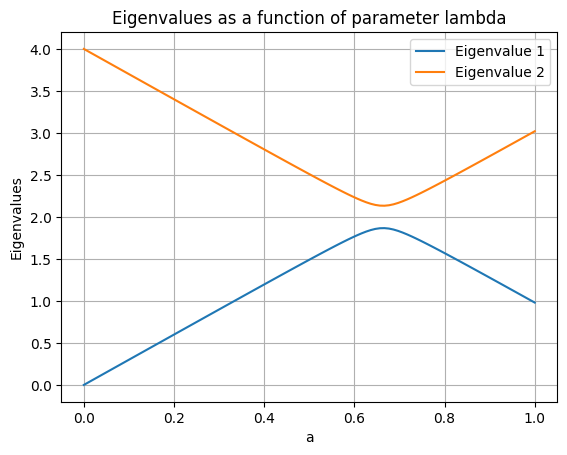

In [4]:

dim = 2
Hamiltonian = np.zeros((dim, dim))
E_1 = 0.0
E_2 = 4.0
V_11 = 3.0
V_22 = -3.0
V_12 = 0.2
V_21 = 0.2

epsilon = (E_1 + E_2) / 2
Omega = (E_1 - E_2) / 2.0
c = (V_11 + V_22) / 2.0
omega_z = (V_11 - V_22) / 2.0
omega_x = V_12
omega_y = V_21

X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])
I = np.array([[1,0],[0,1]])

l_values = np.linspace(0,1,100)

eigenvalues_1 = []
eigenvalues_2 = []

for l in l_values:

    Hamiltonian = epsilon * I + Omega * Z + l * (c*I + omega_z * Z + omega_x * X)
    #print(Hamiltonian)
    eigenvalues, eigenvectors = np.linalg.eigh(Hamiltonian)
    eigenvalues = np.sort(eigenvalues)
    eigenvalues_1.append(eigenvalues[0])
    eigenvalues_2.append(eigenvalues[1])


plt.plot(l_values, eigenvalues_1, label='Eigenvalue 1')
plt.plot(l_values, eigenvalues_2, label='Eigenvalue 2')
plt.xlabel('a')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues as a function of parameter lambda')
plt.legend()
plt.grid(True)
plt.show()




## Part c)

Implement now the variational quantum eigensolver (VQE) for the above
Hamiltonian and set up the circuit(s) which is(are) needed in order to find
the eigenvalues of this system. Discuss the results and compare these
with those from part b). Feel free to use either **Qiskit** or your own
code (based on the setup from part a)) or both approaches. Discuss
your results.

In [1]:
!pip install pennylane --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 44.6 MB/s eta 0:00:00


In [2]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
from pennylane import numpy as qnp

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


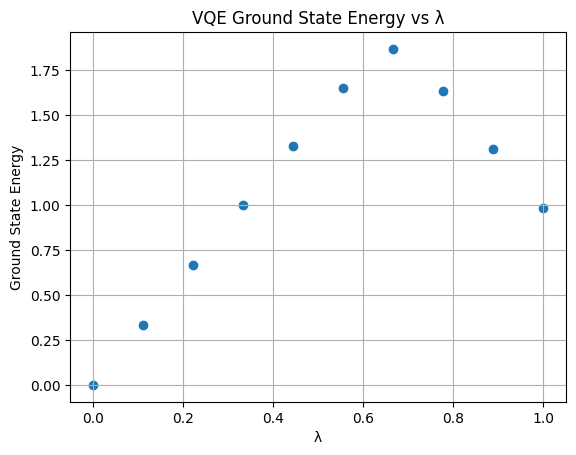

In [12]:
lambda_values = np.linspace(0,1,10)
energies = []

for lmb in lambda_values:
    def build_hamiltonian(lmb):
        coeff = [epsilon, Omega, lmb*c, lmb*omega_z, lmb*omega_x]
        ops = [qml.Identity(0), qml.PauliZ(0), qml.Identity(0), qml.PauliZ(0), qml.PauliX(0)]
        hamiltonian = qml.dot(coeff, ops)
        #print(hamiltonian)
        return hamiltonian

    dev = qml.device("default.qubit", wires=1)




    @qml.qnode(dev)
    def circuit(params):
        qml.RY(params[0], wires=0)
        qml.RZ(params[1], wires=0)
        return qml.expval(build_hamiltonian(lmb))


    params = qnp.random.random(2, requires_grad=True) #2 angles needed
    opt = qml.AdamOptimizer(stepsize=0.1)
    max_iters = 100

    for n in range(max_iters):
      params, energy = opt.step_and_cost(circuit, params)
      #if n % 10 == 0:
        #print(f"Step: {n}, Energy: {energy}")

    #print("VQE Ground state", energy)
    energies.append(energy)



plt.scatter(lambda_values, energies, marker='o')
plt.xlabel('λ')
plt.ylabel('Ground State Energy')
plt.title('VQE Ground State Energy vs λ')
plt.grid()
plt.show()

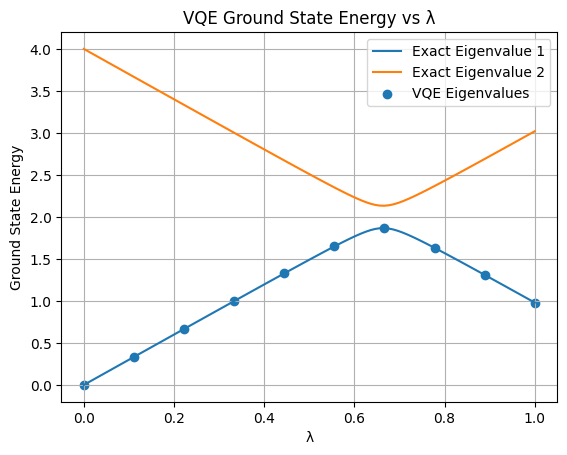

In [ ]:
plt.plot(l_values, eigenvalues_1, label='Exact Eigenvalue 1')
plt.plot(l_values, eigenvalues_2, label='Exact Eigenvalue 2')
plt.scatter(lambda_values, energies, marker='o', label = 'VQE Eigenvalues')
plt.xlabel('λ')
plt.legend()
plt.ylabel('Ground State Energy')
plt.title('VQE Ground State Energy vs λ')
plt.grid()
plt.show()

## Part d)

Extend part c) to a two-qubit system with the following computational
basis states and Hamiltonian matrix written out in terms of Pauli spin
matrices.

This system can be thought of as composed of two subsystems
$A$ and $B$. Each subsystem has computational basis states

$$
\vert 0\rangle_{\mathrm{A,B}}=\begin{bmatrix} 1 & 0\end{bmatrix}^T \hspace{1cm} \vert 1\rangle_{\mathrm{A,B}}=\begin{bmatrix} 0 & 1\end{bmatrix}^T.
$$

The subsystems could represent single particles or composite many-particle systems of a given symmetry.
This leads to the many-body computational basis states

$$
\vert 00\rangle = \vert 0\rangle_{\mathrm{A}}\otimes \vert 0\rangle_{\mathrm{B}}=\begin{bmatrix} 1 & 0 & 0 &0\end{bmatrix}^T,
$$

and

$$
\vert 01\rangle = \vert 0\rangle_{\mathrm{A}}\otimes \vert 1\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 1 & 0 &0\end{bmatrix}^T,
$$

and

$$
\vert 10\rangle = \vert 1\rangle_{\mathrm{A}}\otimes \vert 0\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 0 & 1 &0\end{bmatrix}^T,
$$

and finally

$$
\vert 11\rangle = \vert 1\rangle_{\mathrm{A}}\otimes \vert 1\rangle_{\mathrm{B}}=\begin{bmatrix} 0 & 0 & 0 &1\end{bmatrix}^T.
$$

These computational basis states define also the eigenstates of the non-interacting  Hamiltonian

$$
H_0\vert 00 \rangle = \epsilon_{00}\vert 00 \rangle,
$$

$$
H_0\vert 10 \rangle = \epsilon_{10}\vert 10 \rangle,
$$

$$
H_0\vert 01 \rangle = \epsilon_{01}\vert 01 \rangle,
$$

and

$$
H_0\vert 11 \rangle = \epsilon_{11}\vert 11 \rangle.
$$

The interacting part of the Hamiltonian $H_{\mathrm{I}}$ is given by the tensor product of two $\sigma_x$ and $\sigma_z$  matrices, respectively, that is

$$
H_{\mathrm{I}}=H_x\sigma_x\otimes\sigma_x+H_z\sigma_z\otimes\sigma_z,
$$

where $H_x$ and $H_z$ are interaction strength parameters. Our final Hamiltonian matrix is given by

$$
\boldsymbol{H}=\begin{bmatrix} \epsilon_{00}+H_z & 0 & 0 & H_x \\
                       0  & \epsilon_{10}-H_z & H_x & 0 \\
		       0 & H_x & \epsilon_{01}-H_z & 0 \\
		       H_x & 0 & 0 & \epsilon_{11} +H_z \end{bmatrix}.
$$

The four eigenstates of the above Hamiltonian matrix can in turn be used to
define density matrices. As an example, the density matrix of the
first eigenstate (lowest energy $E_0$) $\Psi_0$ is

$$
\rho_0=\left(\alpha_{00}\vert 00 \rangle\langle 00\vert+\alpha_{10}\vert 10 \rangle\langle 10\vert+\alpha_{01}\vert 01 \rangle\langle 01\vert+\alpha_{11}\vert 11 \rangle\langle 11\vert\right),
$$

where the coefficients $\alpha_{ij}$ are the eigenvector coefficients
resulting from the solution of the above eigenvalue problem.

We can
then in turn define the density matrix for the subsets $A$ or $B$ as

$$
\rho_A=\mathrm{Tr}_B(\rho_{0})=\langle 0 \vert \rho_{0} \vert 0\rangle_{B}+\langle 1 \vert \rho_{0} \vert 1\rangle_{B},
$$

or

$$
\rho_B=\mathrm{Tr}_A(\rho_0)=\langle 0 \vert \rho_{0} \vert 0\rangle_{A}+\langle 1 \vert \rho_{0} \vert 1\rangle_{A}.
$$

The density matrices for these subsets can be used to compute the
so-called von Neumann entropy, which is one of the possible measures
of entanglement. A pure state has entropy equal zero while entangled
state have an entropy larger than zero. The von-Neumann entropy is
defined as

$$
S(A,B)=-\mathrm{Tr}\left(\rho_{A,B}\log_2 (\rho_{A,B})\right).
$$

You can select parameter values (or other of your choice)

In [ ]:
Hx = 2.0
Hz = 3.0
# H_0
Energiesnoninteracting = [0.0, 2.5, 6.5, 7.0]

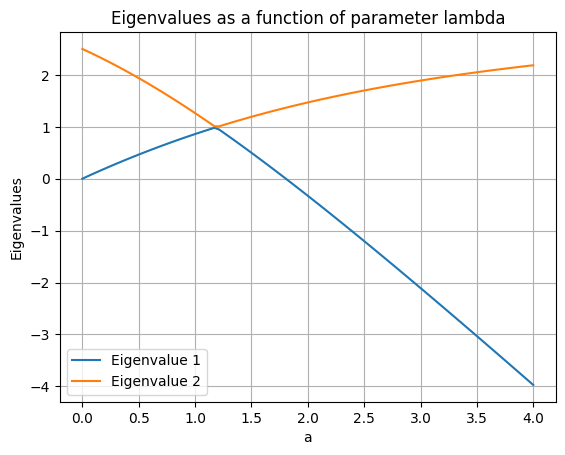

In [ ]:
dim = 4
Hamiltonian = np.zeros((dim, dim))
E_1 = Energiesnoninteracting[0]
E_2 = Energiesnoninteracting[1]
E_3 = Energiesnoninteracting[2]
E_4 = Energiesnoninteracting[3]


X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])

l_values = np.linspace(0,4,100)

eigenvalues_1 = []
eigenvalues_2 = []

for l in l_values:
    H_I = np.kron(X,X)+np.kron(Z,Z)
    H_0 = np.diag(Energiesnoninteracting)
    Hamiltonian = H_0 + l*H_I
    #print(Hamiltonian)
    eigenvalues, eigenvectors = np.linalg.eigh(Hamiltonian)
    eigenvalues = np.sort(eigenvalues)
    eigenvalues_1.append(eigenvalues[0])
    eigenvalues_2.append(eigenvalues[1])


plt.plot(l_values, eigenvalues_1, label='Eigenvalue 1')
plt.plot(l_values, eigenvalues_2, label='Eigenvalue 2')
plt.xlabel('a')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues as a function of parameter lambda')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
lambda_values = np.linspace(0,1,10)
energies = []

for lmb in lambda_values:
    def build_hamiltonian(lmb):
        coeff = [, Omega, lmb*c, lmb*omega_z, lmb*omega_x]
        ops = [qml.Identity(0), qml.PauliZ(0), qml.Identity(0), qml.PauliZ(0), qml.PauliX(0)]
        hamiltonian = qml.dot(coeff, ops)
        #print(hamiltonian)
        return hamiltonian

    dev = qml.device("default.qubit", wires=1)




    @qml.qnode(dev)
    def ciruit(params):
        qml.RY(params[0], wires=0)
        qml.RZ(params[1], wires=0)
        return qml.expval(build_hamiltonian(lmb))


    params = qnp.random.random(2, requires_grad=True) #2 angles needed
    opt = qml.AdamOptimizer(stepsize=0.1)
    max_iters = 100

    for n in range(max_iters):
      params, energy = opt.step_and_cost(ciruit, params)
      #if n % 10 == 0:
        #print(f"Step: {n}, Energy: {energy}")

    #print("VQE Ground state", energy)
    energies.append(energy)


plt.scatter(lambda_values, energies, marker='o')
plt.xlabel('λ')
plt.ylabel('Ground State Energy')
plt.title('VQE Ground State Energy vs λ')
plt.grid()
plt.show()

Compute the eigenvalues **using standard eigenvalue solvers** as functions of
the interaction strength $\lambda$ and study the role of entanglement.
Compute thereafter the Von Neumann entropy for one of the subsystems using the denisty matrix  of the lowest
two-body state . Comment your results.

The example here shows the above von Neumann entropy based on the
density matrix for the lowest many-body state. We see clearly a jump
in the entropy around the point where we have a level crossing. At
interaction strenght $\lambda=0$ we have many-body states purely
defined by their computational basis states. As we switch on the
interaction strength, we obtain an increased degree of mixing and the
entropy increases till we reach the level crossing point where we see
an additional and sudden increase in entropy. Similar behaviors are
observed for the other states. The most important result from this
example is that entanglement is driven by the Hamiltonian itself and
the strength of the interaction matrix elements and the
non-interacting energies.

## Part e)

Compute now the eigenvalues of this system using the VQE method and
set up the circuits needed to find the lowest state. Compare these
results with those from the previous part. Feel free again to either
use your own code for the circuit and your VQE code or use the
functionality of [Qiskit](https://qiskit.org/), or both.